<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="left">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

<h1 align=left><font size = 6, style="color:rgb(200,0,0)">HCluster</font></h1>
<hr>

# Clustering Hierárquico
É uma técnica de mineração de dados que agrupa observações (dados) em clusters com base em sua similaridade seguindo uma estrutura hierárquica.
Existem dois tipos de clustering hierárquico: aglomerativo e divisivo.

> **Aglomerativo**: Esta é uma abordagem "de baixo para cima", cada observação começa como um cluster e, em seguida, é agrupado com outras observações com base em sua similaridade, formando clusters cada vez maiores até que todas as observações estejam em um único cluster.

> **Divisivo**: Esta é uma abordagem "de cima para baixo", todas as observações são agrupadas em um único cluster, e são divididas em clusters menores com base em suas diferenças até que cada observação esteja em seu próprio cluster.

Os resultados do agrupamento hierárquico podem ser então apresentados em um **dendrograma**.



<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://www.orlandoalbarracin.com.br/phyton/dendograma0.png" width=500, align="left">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->

>  **Definindo o número de Clusters**

O número de clusters é calculado a partir de um *ponto* de corte no dendograma que determina a distância máxima que os elementos terão dentro de um agrupamento. Mais adiante vamos discutir um critério para definir o número "ideal" de clusters

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://www.orlandoalbarracin.com.br/phyton/dendograma_3.png" width=550, align="left">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->

### Exemplo - Vamos agrupar um conjunto de dados!

Vamos gerar 8 dados para entender como é feito um dendograma. Aqui cada dado terá duas informações, você pode pensar que cada dado contêm, por exemplo, a renda e a idade de certo usuário. **Não estamos interessados em discutir o código** e sim a construção do dendrograma.

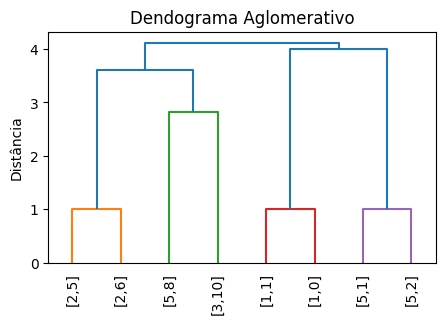

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform


# Cria um conjunto de dados hipotético
X = np.array([[1, 1], [1, 0], [2, 5], [2, 6], [5, 8], [3, 10],[5,1],[5,2]])

# Calcula as distâncias entre os pontos usando a distância euclidiana
Z = linkage(X, metric='euclidean')

# Plota o dendograma
plt.figure(figsize=(5, 3))

plt.title('Dendograma Aglomerativo')
plt.ylabel('Distância')
dendrogram(Z, leaf_rotation=90, leaf_font_size=10,
           labels=["[1,1]","[1,0]","[2,5]","[2,6]","[5,8]","[3,10]","[5,1]","[5,2]"])
plt.show()

#### **Como foi construído o dendograma?**

1. Primeiro é mensurada a similaridade dos dados calculando uma distância, por exemplo, a euclidiana.

*   Dado 1: [1,1]
*   Dado 2: [1,0]  
*   Dado 3: [2,5]
*   Dado 4: [2,6]
*   Dado 5: [5,8]
*   Dado 6: [3,10]
*   Dado 7: [5,1]
*   Dado 8: [5,2]


Distância euclidiana entre o Dado 1 e Dado 2:
$$ d_{12}=\sqrt{(1-1)^2+(1-0)^2}=1$$

Distância euclidiana entre o Dado 1 e Dado 3:
$$ d_{12}=\sqrt{(1-2)^2+(1-5)^2} =4,123106$$

A seguir, apresentam-se todas as distâncias calculadas

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://www.orlandoalbarracin.com.br/phyton/dendograma_1.png" width=550, align="left">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->

Os dados são agrupados em pares, usando como critério, a menor distância. Note que agora temos 4 clusters

*   Cluster 1: [1,1] e [1,0]
*   Cluster 2: [2,5] e [2,6]
*   Cluster 3: [5,8] e [3,10]
*   Cluster 4: [5,1] 2 [5,2]




2. Para continuar como o agrupamento, vamos procurar as seguintes duas menores distâncias.

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://www.orlandoalbarracin.com.br/phyton/dendograma_2.png" width=550, align="left">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->

Assim,
*   Os clusters que tem os valores [1,1] e [5,1] devem ser agrupados em um único cluster (distância de 4).
     *   O novo cluster terá 4 dados: [1,1], [1,0], [5,1] e [5,2]
*   Os clusters que tem os valores [2,6] e [5,8] devem ser agrupados em um único cluster (distância de 3,6055).
     *   O novo cluster terá 4 dados: [2,5], [2,6], [5,8] e [3,10]

Note que a seguinte menor distância é 4,1231 que juntaria os valores [1,1] e [2,5], ou seja, cria-se um novo cluster que junta todos os oito valores.

## Características do Clustering Hierárquico

A seguir, vamos discutir duas características deste método:
*   A **função distância** a ser implementada
*   Como definir a distância entre um ponto e um cluster **(Linkage)**



### Funções Distância
A distância euclidiana é a mais aplicadam em modelos *knn*, *kmeans*, mas algumas encontram maior uso em contextos específicos como a distância de **Hamming** para dados binários ou a distância **coseno** para análise de dados de documentos.


Algumas funções distância empregadas em Ciência de Dados:

*   Distância euclidiana ${\displaystyle \| ab \| _ {2} = {\sqrt {\sum_{i} (a_ {i} -b_ {i}) ^ {2}}}} $

*   Distância euclidiana quadrada ${\displaystyle \| ab \| _ {2} ^ {2} = \sum _ {i} (a_ {i} -b_ {i}) ^ {2}} $

*   Distância de Manhattan ${\displaystyle \| ab \| _ {1} = \sum _ {i} | a_ {i} -b_ {i} |}$

*   Distância máxima ${\displaystyle \| ab \| _ {\infty} = \max _ {i} | a_ {i} -b_ {i} |}$

*   Distância de Mahalanobis ${\displaystyle {\sqrt {(ab) ^ {\top} S ^ {- 1} (ab)}}}$  onde S é a matriz de covariância

Outras distâncias:

*   Distância de Hamming para Strings

*   Distância Cosseno para análise de dados com representação vetorial.

### Linkage

A função distância está bem definida para distância de dois elementos. Mas ainda não definimos a distância de um elemento a um grupo.


Alguns critérios de ligação comumente empregados são:

1. Complete linkage

$$d(A,B) = \{\max \, d (a, b): a \in A, \, b \in B \, \}$$

2. Single linkage

$$d(A,B) = \{\min \, d (a, b): a \in A, \, b \in B \, \}$$

3. Average linkage

$$d(A,B) = {\displaystyle {\frac {1} {| A | \cdot | B |}} \sum _ {a \in A} \sum _ {b \in B} d (a, b)} $$


Importante notar que o tipo de linkage empregado altera a formação dos agrupamentos além de ter impacto sobre o desempenho do processamento.

No exemplo, mostrado acima foi considerada single linkage, vamos ver a diferença entre os agrupamentos usando complete linkage.

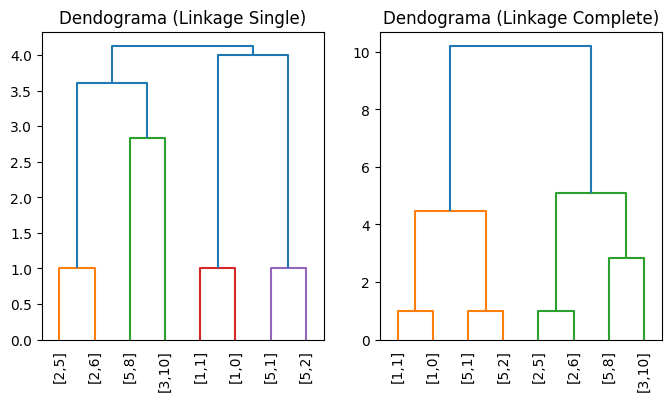

In [ ]:
# Cria um conjunto de dados hipotético
X = np.array([[1, 1], [1, 0], [2, 5], [2, 6], [5, 8], [3, 10],[5,1],[5,2]])

# Calcula as distâncias entre os pontos usando a distância euclidiana
Z_single = linkage(X,method='single', metric='euclidean')
Z_complete = linkage(X,method='complete', metric='euclidean')


# Plota o dendograma
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

ax1.set_title('Dendograma (Linkage Single)')
dendrogram(Z_single, ax=ax1, leaf_rotation=90, leaf_font_size=10,
           labels=["[1,1]","[1,0]","[2,5]","[2,6]","[5,8]","[3,10]","[5,1]","[5,2]"])

ax2.set_title('Dendograma (Linkage Complete)')
dendrogram(Z_complete, ax=ax2, leaf_rotation=90, leaf_font_size=10,
           labels=["[1,1]","[1,0]","[2,5]","[2,6]","[5,8]","[3,10]","[5,1]","[5,2]"])
plt.show()

## Análise de dados reais I
Caso: **Wholesale Customer Data**

O data set tem informações de um distribuidore seus clientes e inclui os gastos anuais para diferentes produtos.

https://archive.ics.uci.edu/ml/datasets/Wholesale+customers





In [ ]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


> **Normalizando os dados**

Podemos usar a função `preprocessing.scale` ou `preprocessing.normalize`.

In [ ]:
from sklearn.preprocessing import normalize

df_scaled = pd.DataFrame(normalize(df), columns=df.columns)
df_scaled.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


### Fazendo um agrupando via **Aglomerative Clustering**





Vamos calcular primeiro o número "ideal" de clusters para o conjunto de dados.

Para isto, vamos usar a métrica **Silhouette** que indica quão bem um objeto se ajusta ao seu próprio cluster em relação aos outros clusters, seus valores variam entre -1 e 1, em que valores mais próximos de 1 representam agrupamentos melhores e valores negativos indicam que um ponto pode ter sido atribuído ao grupo errado.

Mais informação aqui: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering


for n_clusters in range(2,8):
  model = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='complete')
  model.fit(df_scaled)
  print('Média do valor de Silhouette para ', n_clusters , ' clusters: ', silhouette_score(df_scaled, model.labels_))

Média do valor de Silhouette para  2  clusters:  0.46301872587756143
Média do valor de Silhouette para  3  clusters:  0.4464097957042499
Média do valor de Silhouette para  4  clusters:  0.3880205136318786
Média do valor de Silhouette para  5  clusters:  0.34265571497030384
Média do valor de Silhouette para  6  clusters:  0.3449970707513369
Média do valor de Silhouette para  7  clusters:  0.29717445118145003



Assim, vamos separar os dados em dois clusters.

In [ ]:
from sklearn.cluster import AgglomerativeClustering

clf = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
# clf = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='single')
# clf = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')

clf.fit(df_scaled)

# Resultados
labels = clf.labels_
print(labels)

[1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1
 1 0 1 1 1 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 1 0 1 0 1 0 1 0 0 1 0 1 1 1 0 1
 1 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 1 1 1 0 1 1 0 1 0
 1 0 0 0 0 1 1 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 1 1 0
 0 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1
 1 1 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1
 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 1 1 0 1
 0 1 1 1 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 0 0 1 1 0 0 0 1 0 1 1 1 1 0 1 1 0 1 0 0 1 0 1 1 1 0 1 1]


In [ ]:
df['cluster'] = labels
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,2,3,12669,9656,7561,214,2674,1338,1
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,1
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,1


### Vamos fazer o dendograma

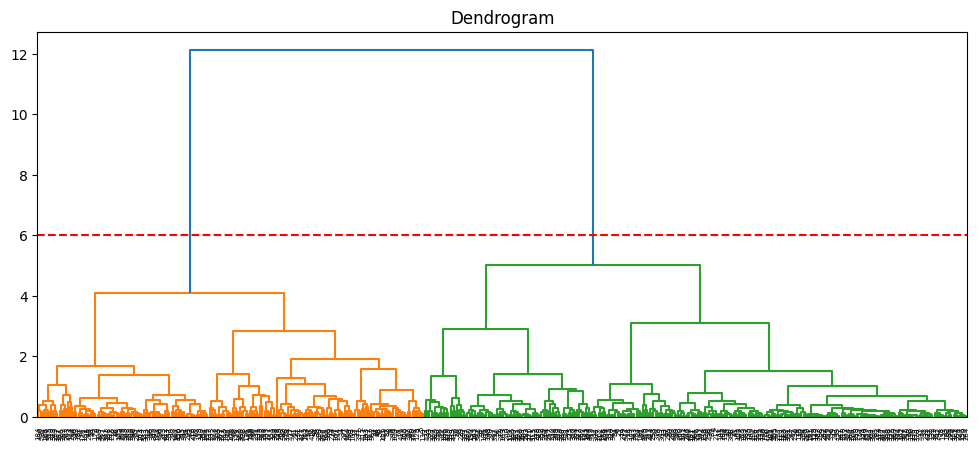

In [ ]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.title("Dendrogram")
plt.xticks(rotation=90)

dendrogram = shc.dendrogram(shc.linkage(df_scaled, method='ward')) # cuidado com o nome
plt.axhline(y=6, color='r', linestyle='--')

plt.show()


### Caracterizando os grupos

Vamos analisar cada grupo! Aparentemente os grupos são separados por: Produtos frescos e congelados / Mercearia

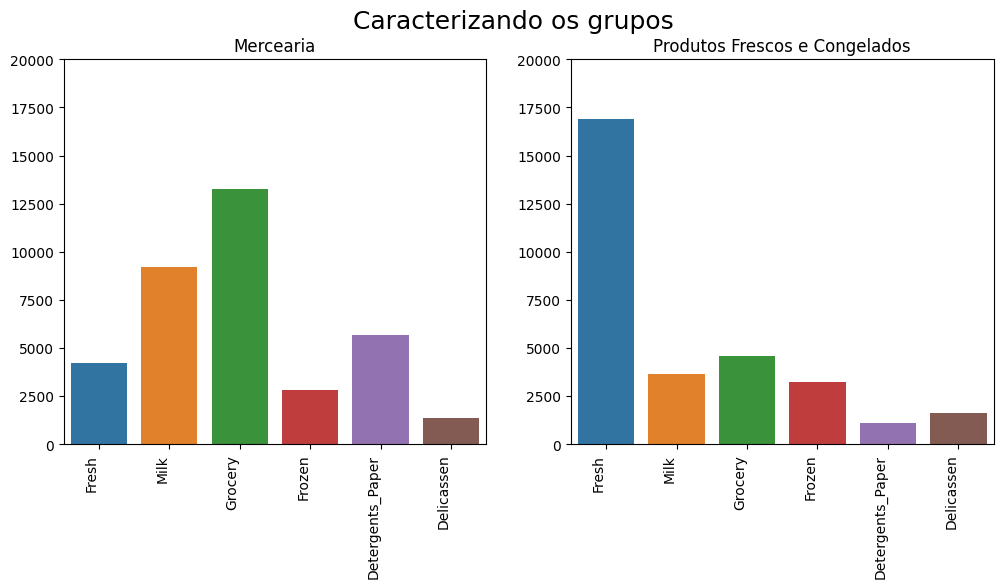

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

g = pd.DataFrame( df.drop(columns=['Channel','Region']).groupby('cluster').mean() ).reset_index()

f, axis = plt.subplots(1,2, figsize=(12,5))

sns.barplot(data=g[g.cluster==0].drop(columns='cluster'),ax=axis[0],estimator="mean")
axis[0].set_title('Mercearia')
axis[0].set_xticklabels(axis[0].get_xticklabels(), rotation=90, ha="right")
axis[0].set_ylim(0, 20000)

sns.barplot(data=g[g.cluster==1].drop(columns='cluster'),ax=axis[1],estimator="mean")
axis[1].set_title('Produtos Frescos e Congelados')
axis[1].set_xticklabels(axis[1].get_xticklabels(), rotation=90, ha="right")
axis[1].set_ylim(0, 20000)

plt.suptitle('Caracterizando os grupos',fontsize=18)
plt.show()

## Análise de dados reais II

Caso: **Wholesale Customer Data**

Vamos considerar aqui a clusterização dos fornecedores **somente com base nos seus produtos**, excluindo assim o `Channel` e `Region`.

In [ ]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,2,3,12669,9656,7561,214,2674,1338,1
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,1
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,1


In [ ]:
# Define os dados do modelo
X = df.drop(columns=['Channel','Region'])

# Normalização e outras preparações dos dados
from sklearn.preprocessing import normalize
X = normalize(X)

# Avalia o número de agrupamentos desejado
from sklearn.cluster import AgglomerativeClustering

for n_clusters in range(2,8):
  clf = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
  clf.fit_predict(df_scaled)
  labels = clf.labels_
  print('Média do valor de Silhouette para ', n_clusters , ' clusters: ', silhouette_score(X, labels, metric='euclidean'))

# Faz a clusterização selecionada

## Declara o modelo
clf = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')

## 'Treina' o modelo
clf.fit(df_scaled)

# Resultados
labels = clf.labels_
print(labels)

# Associando os dados
df['cluster'] = labels
print(df.head())



Média do valor de Silhouette para  2  clusters:  0.49090495412595425
Média do valor de Silhouette para  3  clusters:  0.4052855094264928
Média do valor de Silhouette para  4  clusters:  0.33043406585672813
Média do valor de Silhouette para  5  clusters:  0.2957297243811912
Média do valor de Silhouette para  6  clusters:  0.30400766625397696
Média do valor de Silhouette para  7  clusters:  0.31825241074724475
[1 1 1 0 0 1 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0
 1 1 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1 0 1 0 0 0 0 0
 1 0 0 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 1 1 1 0 0 0 1 1 1 0 0 0 1 1 1 1 0
 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0
 0 0 0 1 0 1 0 1 1 0 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1
 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1
 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0
 0 0 0 0 1 1 1 1 0 1 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 

## Referências
Você pode encontrar mais detalhes sobre esses métodos em:

https://scikit-learn.org/stable/modules/clustering.html

https://online.stat.psu.edu/stat555/node/85/




## Discutindo um pouco mais (opcional)

### Comparando os Métodos



Abaixo uma exploração de como os métodos de Clusterização Partitivo (K-médias), Hierárquico e *DBScan* podem diferenciar.

O código abaixo não tem importância para você, foque apenas nos resultados.

Automatically created module for IPython interactive environment


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-65-7c883f9e798a>:139: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_pred = algorithm.labels_.astype(np.int)
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  w

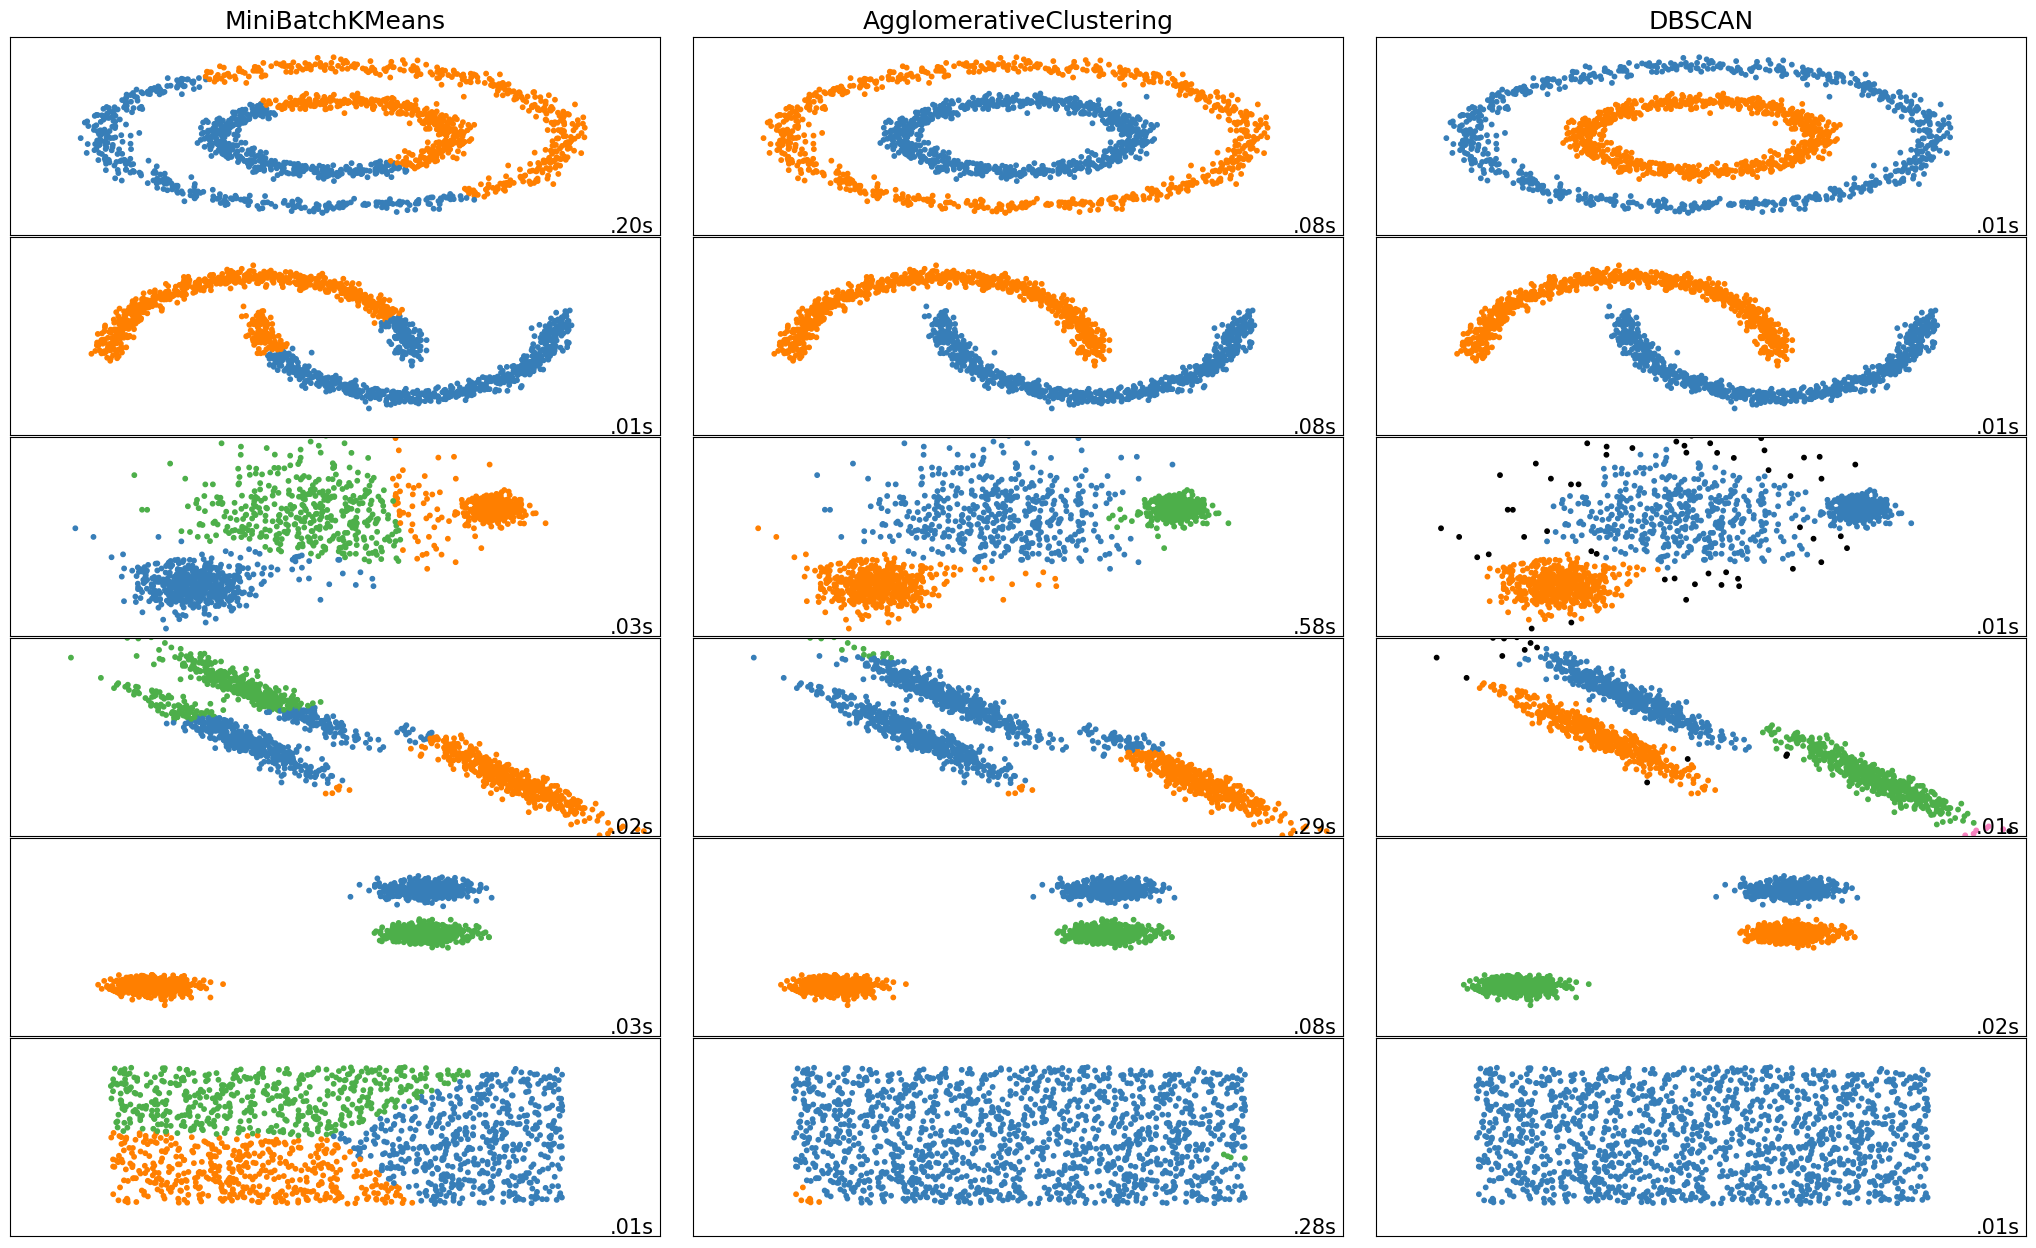

In [ ]:
print(__doc__)

import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

np.random.seed(0)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)

# ============
# Set up cluster parameters
# ============
plt.figure(figsize=(9 * 2 + 3, 12.5))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

plot_num = 1

default_base = {'quantile': .3,
                'eps': .3,
                'damping': .9,
                'preference': -200,
                'n_neighbors': 10,
                'n_clusters': 3,
                'min_samples': 20,
                'xi': 0.05,
                'min_cluster_size': 0.1}

datasets = [
    (noisy_circles, {'damping': .77, 'preference': -240,
                     'quantile': .2, 'n_clusters': 2,
                     'min_samples': 20, 'xi': 0.25}),
    (noisy_moons, {'damping': .75, 'preference': -220, 'n_clusters': 2}),
    (varied, {'eps': .18, 'n_neighbors': 2,
              'min_samples': 5, 'xi': 0.035, 'min_cluster_size': .2}),
    (aniso, {'eps': .15, 'n_neighbors': 2,
             'min_samples': 20, 'xi': 0.1, 'min_cluster_size': .2}),
    (blobs, {}),
    (no_structure, {})]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=params['quantile'])

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(
        X, n_neighbors=params['n_neighbors'], include_self=False)
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    # ============
    # Create cluster objects
    # ============
    ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
    two_means = cluster.MiniBatchKMeans(n_clusters=params['n_clusters'])
    ward = cluster.AgglomerativeClustering(
        n_clusters=params['n_clusters'], linkage='ward',
        connectivity=connectivity)
    spectral = cluster.SpectralClustering(
        n_clusters=params['n_clusters'], eigen_solver='arpack',
        affinity="nearest_neighbors")
    dbscan = cluster.DBSCAN(eps=params['eps'])
    optics = cluster.OPTICS(min_samples=params['min_samples'],
                            xi=params['xi'],
                            min_cluster_size=params['min_cluster_size'])
    affinity_propagation = cluster.AffinityPropagation(
        damping=params['damping'], preference=params['preference'])
    average_linkage = cluster.AgglomerativeClustering(
        linkage="average", affinity="cityblock",
        n_clusters=params['n_clusters'], connectivity=connectivity)
    birch = cluster.Birch(n_clusters=params['n_clusters'])
    gmm = mixture.GaussianMixture(
        n_components=params['n_clusters'], covariance_type='full')

    clustering_algorithms = (
        ('MiniBatchKMeans', two_means),
        ('AgglomerativeClustering', average_linkage),
        ('DBSCAN', dbscan),
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the " +
                "connectivity matrix is [0-9]{1,2}" +
                " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning)
            warnings.filterwarnings(
                "ignore",
                message="Graph is not fully connected, spectral embedding" +
                " may not work as expected.",
                category=UserWarning)
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
        # add black color for outliers (if any)
        colors = np.append(colors, ["#000000"])
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1

plt.show()

### Silhoutte

O código abaixo não tem importância para você, apenas os gráficos.

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.5002245229760047
For n_clusters = 3 The average silhouette_score is : 0.4490241274990781
For n_clusters = 4 The average silhouette_score is : 0.3916603082929343
For n_clusters = 5 The average silhouette_score is : 0.3740244627808385
For n_clusters = 6 The average silhouette_score is : 0.36552543309244806


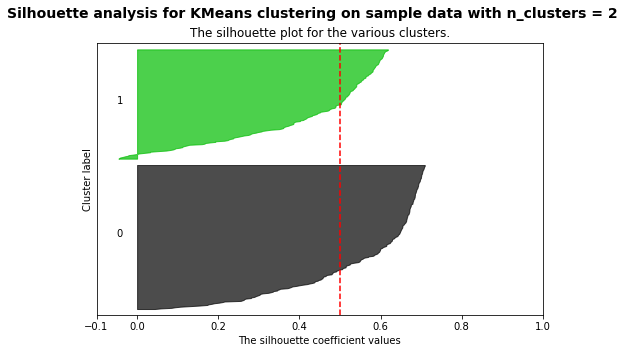

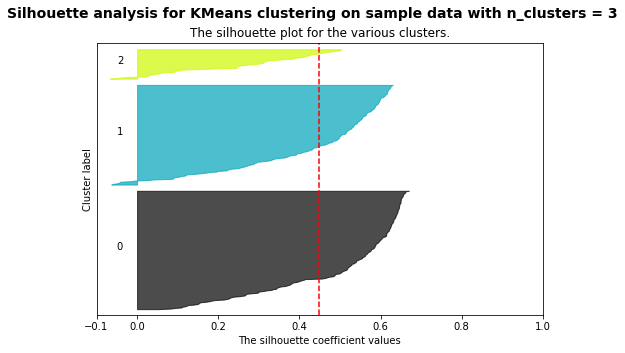

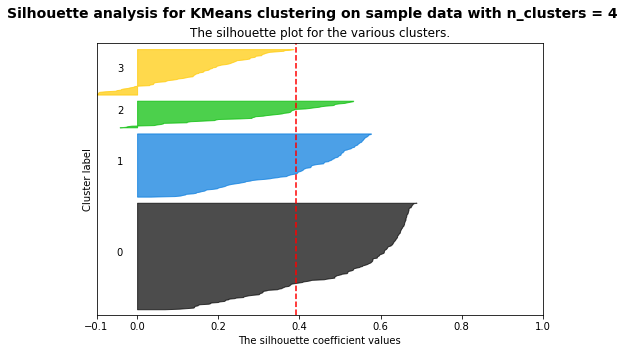

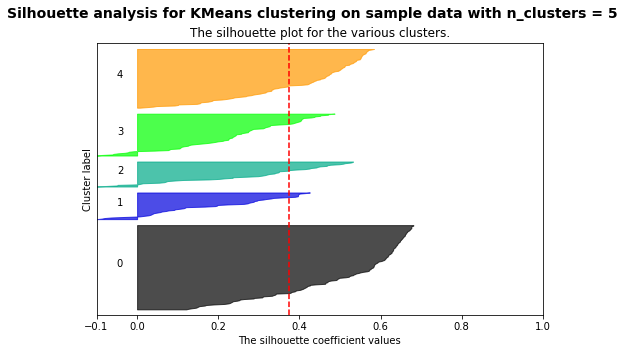

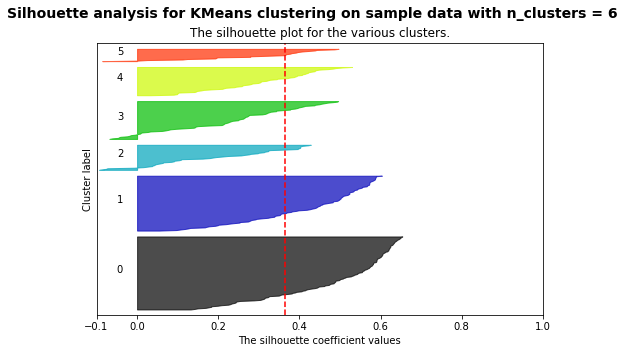

In [ ]:
#@markdown Silhouette analysis for KMeans clustering

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X = df_scaled

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1,1)
    fig.set_size_inches(8, 5)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])



    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

### Complexidade \* (*um tópico opcional avançado*)



O algoritmo padrão para agrupamento aglomerativo hierárquico tem uma complexidade de tempo de ${\displaystyle {\mathcal {O}} (n ^ {3})}$  e requer $ {\displaystyle \Omega (n ^ {2})}$ de Memória, o que o torna muito lento até mesmo para conjuntos de dados de tamanhos médios.
No entanto, para alguns casos especiais, métodos aglomerativos eficientes ideais (de complexidade ${\displaystyle {\mathcal {O}} (n ^ {2})}$ são conhecidos *Single Linkage* para ligação única e *Complete Linkage* para agrupamento de ligação completa. Com um heap, o tempo de execução do caso geral pode ser reduzido para ${\displaystyle {\mathcal {O}} (n ^ {2} \ log  n)}$ , uma melhoria no limite mencionado de ${\displaystyle {\mathcal {O}} (n ^ {3})}$ , ao custo de aumentar ainda mais o requisitos de memória. Em muitos casos, a sobrecarga de memória dessa abordagem é muito grande para torná-la utilizável na prática.

Exceto para o caso especial de ligação única, nenhum dos algoritmos (exceto pesquisa exaustiva em ${\displaystyle {\mathcal {O}} (2 ^ {n})}$ pode ser garantido para encontrar a solução ideal.

O agrupamento divisivo com uma pesquisa exaustiva é ${\displaystyle {\mathcal {O}} (2 ^ {n})}$ , mas é comum usar heurísticas mais rápidas para escolher divisões, como k-médias.